In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline

In [2]:
print(os.getcwd())
os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3') 
print(os.getcwd())

/Users/liuyang/Desktop/Springboard_Capstone3/Notebook
/Users/liuyang/Desktop/Springboard_Capstone3


In [3]:
df = pd.read_csv('data/train.csv')

In [4]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df.shape

(1017209, 9)

In [6]:
df = df.sort_values(['Date', 'Store'], ascending=True)

In [7]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1
1016096,2,2,2013-01-01,0,0,0,0,a,1
1016097,3,2,2013-01-01,0,0,0,0,a,1
1016098,4,2,2013-01-01,0,0,0,0,a,1
1016099,5,2,2013-01-01,0,0,0,0,a,1


In [8]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/liuyang/Desktop/Springboard_Capstone3/notebook')
# os.chdir('/Users/liuyang/Desktop/Springboard_Capstone3/notebook') 
import eda

In [9]:
from eda import data_process, Sales_EDA, sumby, individual_store, combined_storedata, combined_store_EDA

In [10]:
df_process = data_process(df)

In [11]:
df_process.convert_datetime('Date')

In [12]:
df_process.data_info()

,column,counts,unique_value_pct,nan_pct,data_type
3,Sales,21734,2.1366,0.0,int64
4,Customers,4086,0.4017,0.0,int64
0,Store,1115,0.1096,0.0,int64
2,Date,942,0.0926,0.0,datetime64[ns]
1,DayOfWeek,7,0.0007,0.0,int64
7,StateHoliday,5,0.0005,0.0,object
5,Open,2,0.0002,0.0,int64
6,Promo,2,0.0002,0.0,int64
8,SchoolHoliday,2,0.0002,0.0,int64


In [15]:
df_process.str_to_int('StateHoliday')

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
StateHoliday,1017209.0,0.045163,0.283656,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [17]:
period_days = len(set(df.Date))
period_weeks = len(df.set_index('Date').groupby('Date').resample('w'))
numberOfstore = len(set(df.Store))

print(f'Data contains data of {numberOfstore} stores')
print(f'Data contains data of {period_days} days ({df.Date.min()} ~ {df.Date.max()})')
print(f'Data contains data of {period_weeks} weeks')

Data contains data of 1115 stores
Data contains data of 942 days (2013-01-01 00:00:00 ~ 2015-07-31 00:00:00)
Data contains data of 135 weeks


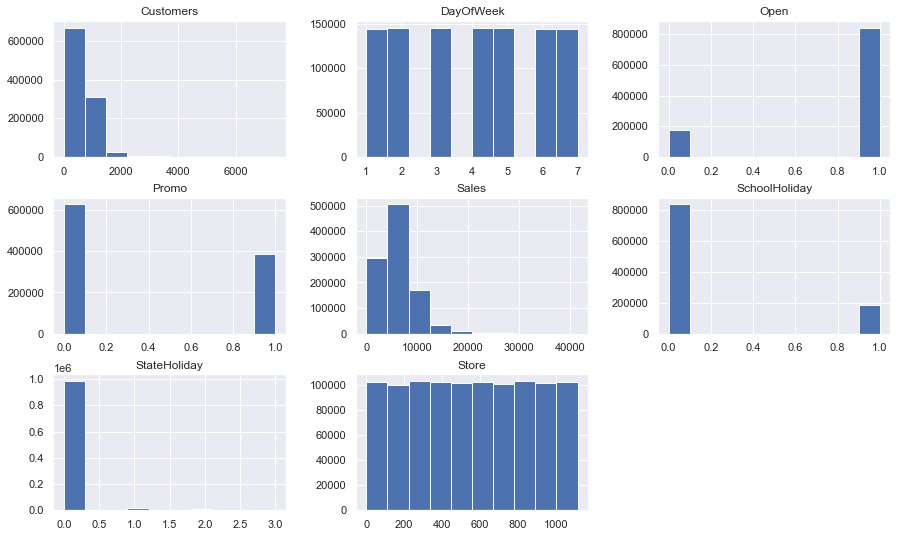

In [18]:
fig ,ax = plt.subplots(figsize=(15,9))
df.hist(ax=ax)
plt.show()

## Daily Sales

In [19]:
def histplot_mean_median(data, col):
    data[col].hist()
    per50 = data[col].describe()['50%']
    mean = data[col].describe()['mean']
    plt.axvline(per50,color='r')
    plt.axvline(mean, color='r', linestyle='-.')
    plt.legend(['median', 'mean'])

    plt.title(f'Daily {col} Distribution', fontsize=15)
    plt.show()

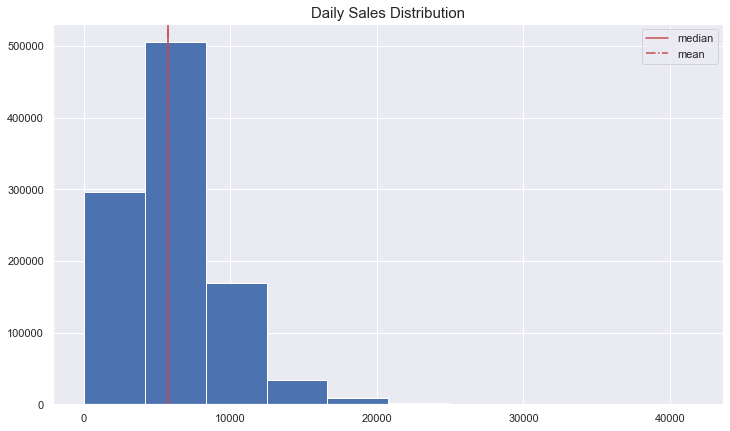

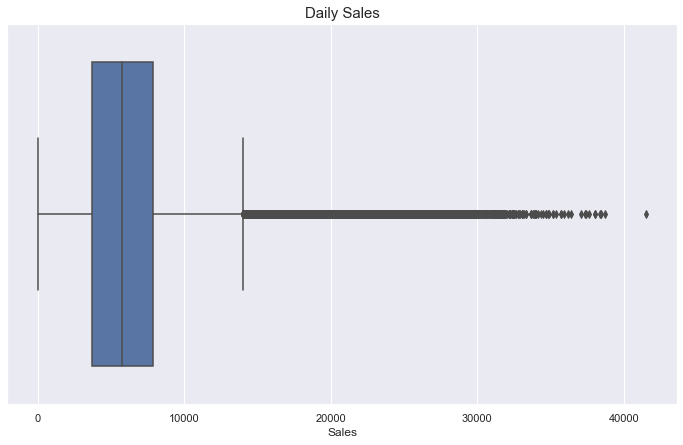

In [20]:
# check daily sales of 1115 stores over 942 days
plt.rcParams['figure.figsize'] = (12, 7)
histplot_mean_median(df, 'Sales')

sns.boxplot(x=df.Sales)
plt.title('Daily Sales', fontsize=15)
plt.show()

In the histogram, we can see mean and median are very close to each other

In [21]:
# check the details of daily sales outlier
df.loc[df.Sales.idxmax()]

Store                            909
DayOfWeek                          1
Date             2015-06-22 00:00:00
Sales                          41551
Customers                       1721
Open                               1
Promo                              0
StateHoliday                       0
SchoolHoliday                      0
Name: 44393, dtype: object

Store 909 open days: 607
Store 909 closed days: 151


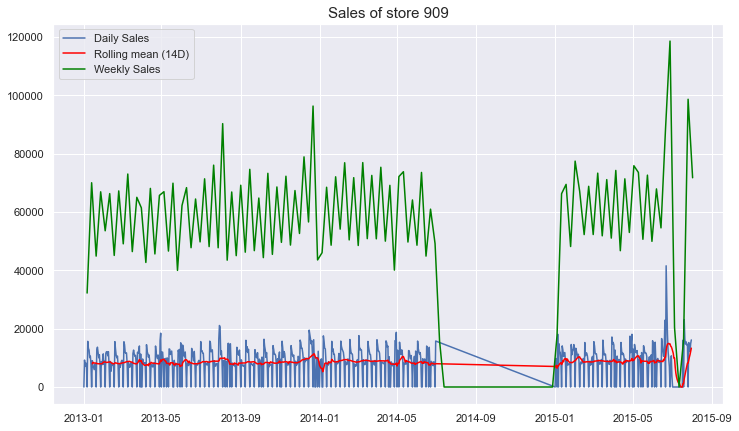

In [22]:
# check store open days and sales plot for store 909
storeid=909
store909 = individual_store(df, 'Date', storeid)

store909.store_opendays()
store909.lineplot('Sales')

We can see the sales peak happens at 2015-06-22.
By analyzing the sales plot of store 909 we can see the peak was just an one time exception.

## Daily Customer

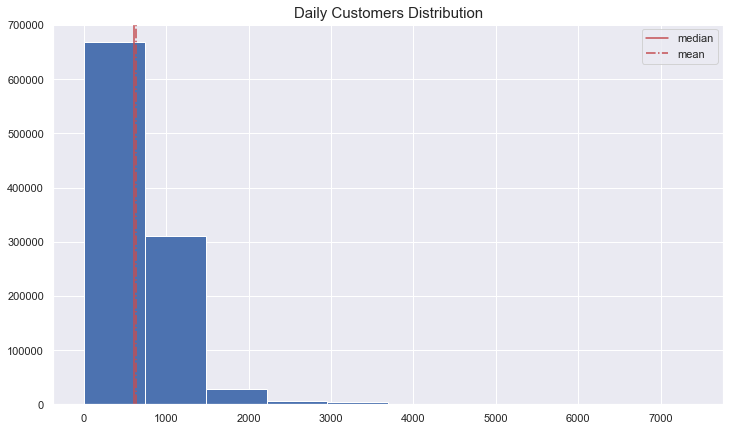

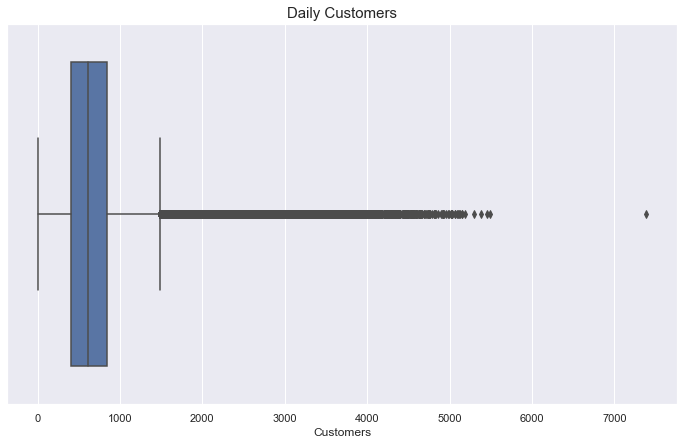

In [23]:
# check daily customers of 1115 stores over 942 days
histplot_mean_median(df, 'Customers')

sns.boxplot(x=df.Customers)
plt.title('Daily Customers', fontsize=15)
plt.show()

In [24]:
# check the details of daily customers outlier
df.loc[df.Customers.idxmax()]

Store                            817
DayOfWeek                          2
Date             2013-01-22 00:00:00
Sales                          27190
Customers                       7388
Open                               1
Promo                              1
StateHoliday                       0
SchoolHoliday                      0
Name: 993496, dtype: object

Store 817 open days: 784
Store 817 closed days: 158


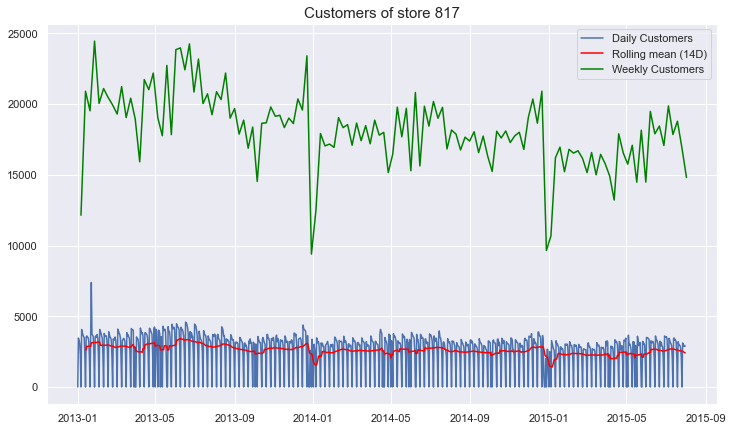

In [25]:
# check the customer line plot for store 817
storeid=817
store817 = individual_store(df, 'Date',storeid)
store817.store_opendays()
store817.lineplot('Customers')

We can see the peak of customer happens at 2013-01-22. By analyzing the customer plot of store 817 we can see the peak was just an one time exception.

## 942 Days Sum up by Store

In [26]:
sumsales_by_store = sumby(df, 'Store', 'Sales')

In [27]:
#alldata = totalby(df, 'Date', 'Customers')

In [28]:
#alldata.total_by()

In [29]:
# make a dataframe contains sum up sales and total sales shares for each store over 942 days
# sorted in descending order
sumsales_by_store.get_sum_pct()

,Store,Sales,pct
0,262,19516842,0.332304
1,817,17057867,0.290437
2,562,16927322,0.288214
3,1114,16202585,0.275874
4,251,14896870,0.253642
...,...,...,...
1110,263,2306075,0.039264
1111,208,2302052,0.039196
1112,198,2268273,0.038621
1113,543,2179287,0.037106


In [30]:
# statistic summary of total sales and shares of each store over 942 days
sumsales_by_store.get_sum_pct().describe()

,Store,Sales,pct
count,1115.00000,1.115000e+03,1115.000000
mean,558.00000,5.267427e+06,0.089686
std,322.01708,1.951304e+06,0.033224
min,1.00000,2.114322e+06,0.036000
25%,279.50000,3.949377e+06,0.067244
50%,558.00000,4.990259e+06,0.084967
75%,836.50000,6.084148e+06,0.103592
max,1115.00000,1.951684e+07,0.332304


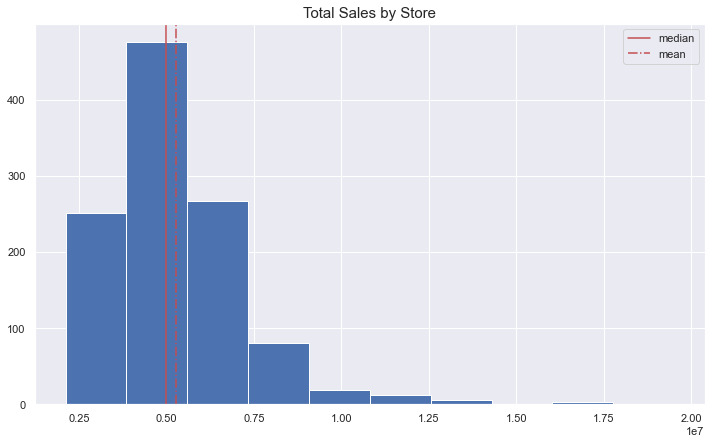

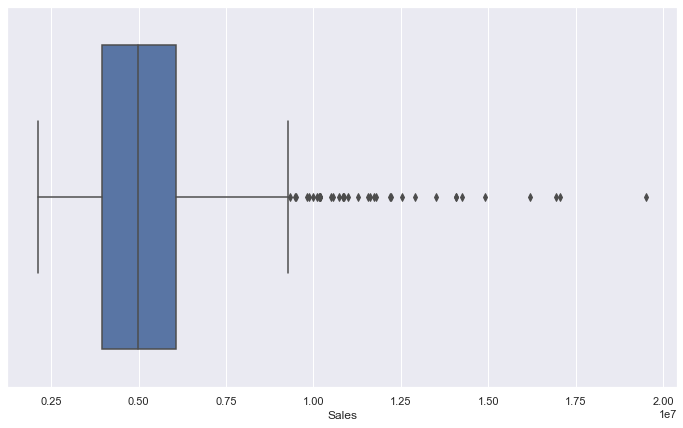

In [31]:
# check distribution of sum up sales over 942 days of 1115 stores
sumsales_by_store.histgram('Sales')

sns.boxplot(x=sumsales_by_store.get_sum_pct().Sales)
plt.show()

In [32]:
# get the sum of sales and share of top 10 stores over 942 day
sumsales_by_store.topN_sum_share(10)

Top 10 Store Total Sales: 153404852.0
Top 10 Store Total Sales Share in All Stores: 2.612%


## Sum up Sales Barplot of Top 10 Stores over 942 Days

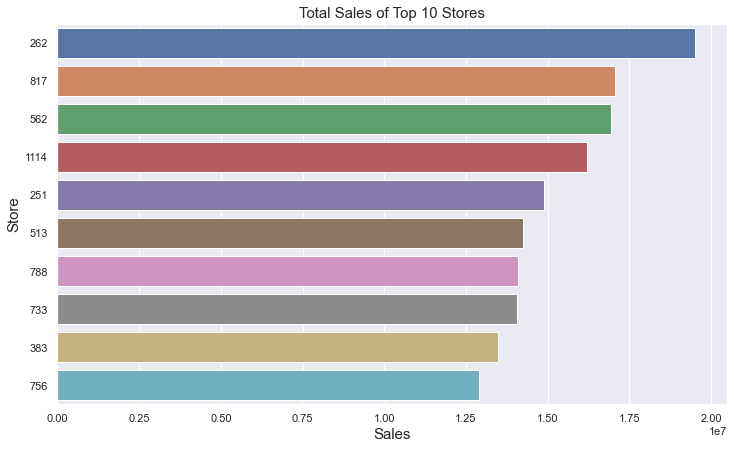

In [33]:
sumsales_by_store.topN_barplot(10)

## Daily Sales Violinplot of Top 10 Stores over 942 Days

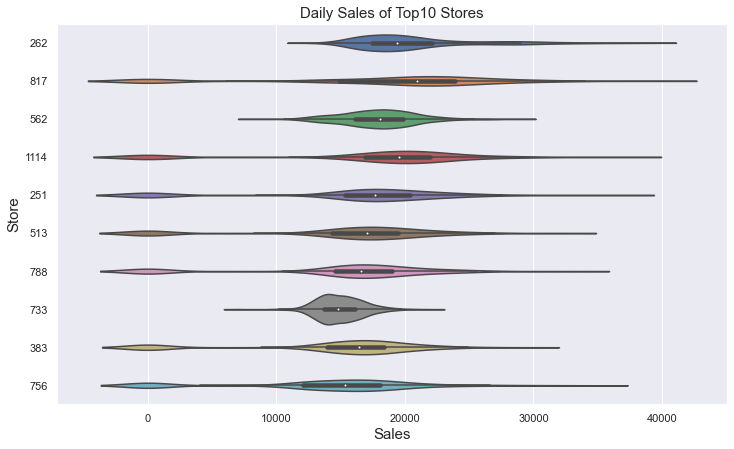

In [34]:
# check daily sales of Top 10 stores 
sales_by_store= Sales_EDA(df)
sales_by_store.topN_daily_violinplot(10)

## Weekly Total Sales

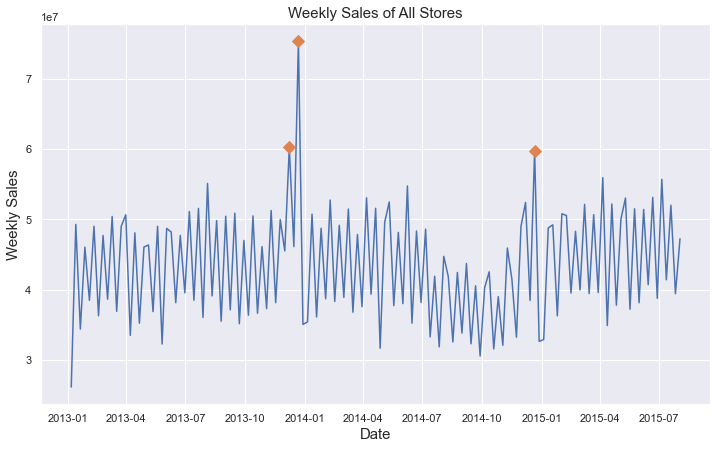

Three peaks happens at: 
 Date
2013-12-22    75371329
2013-12-08    60241244
2014-12-21    59780187
Name: Sales, dtype: int64


In [35]:
markers= df_process.pivot_table('Date', 'sum').resample('w').Sales.sum().nlargest(3)
weeklytotalsales = df_process.pivot_table('Date', 'sum').resample('w').Sales.sum()

plt.figure(figsize=(12, 7))
plt.plot(weeklytotalsales.index, weeklytotalsales.values)
plt.plot(markers.index, markers.values, "D", markersize=8)
plt.title('Weekly Sales of All Stores', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Weekly Sales', fontsize=15)
plt.show()

print(f'Three peaks happens at: \n {markers}')

#### From the weekly sales sum up by all stores, We can see the 3 peaks happens at 12-08 ~ 12-22 week in both 2013 and 2014, which is around christmas season. Therefore we assume this trend also exist in individual store. 

## Plot the number of daily open stores over 942 days

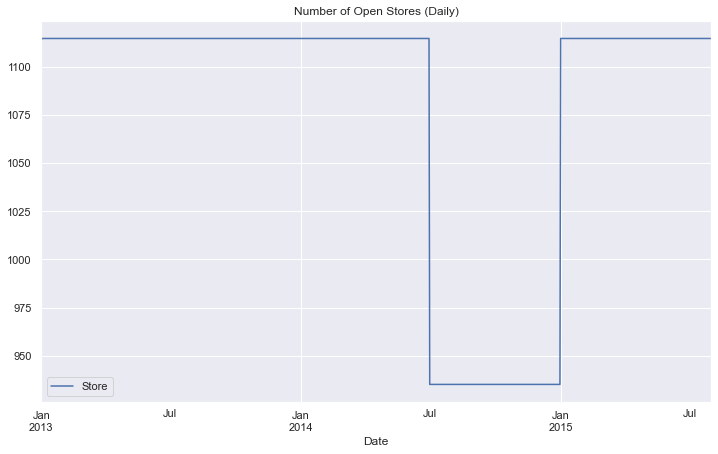

In [36]:
pd.pivot_table(df[['Date', 'Store']], index='Date', aggfunc='count').plot()
plt.title('Number of Open Stores (Daily)')
plt.show()

In [37]:
closedstore = (pd.pivot_table(df[['Date', 'Store']], index='Date', aggfunc='count').max() - pd.pivot_table(df[['Date', 'Store']], index='Date', aggfunc='count').min())[0]
print(f'number of closed store:{closedstore}')

number of closed store:180


#### We can see there's a big decline in sales during 2014-07-01 ~ 2014-12-31 as 180 stores were closed due to refurbishment

## Check Weekly Sales Plot for Top 3 and Bottom 3 Stores

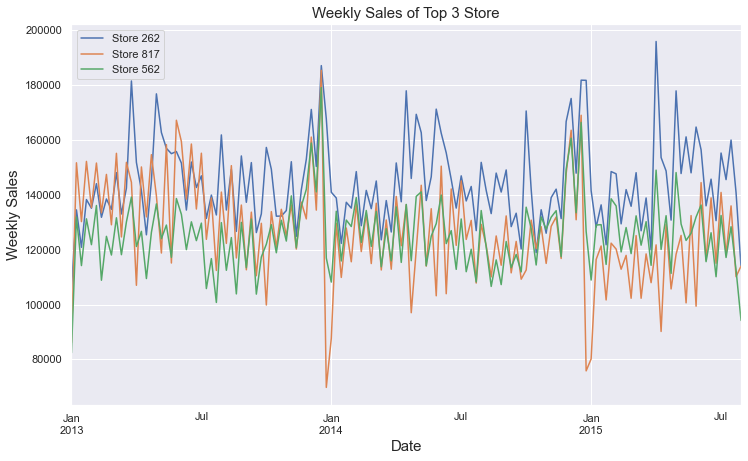

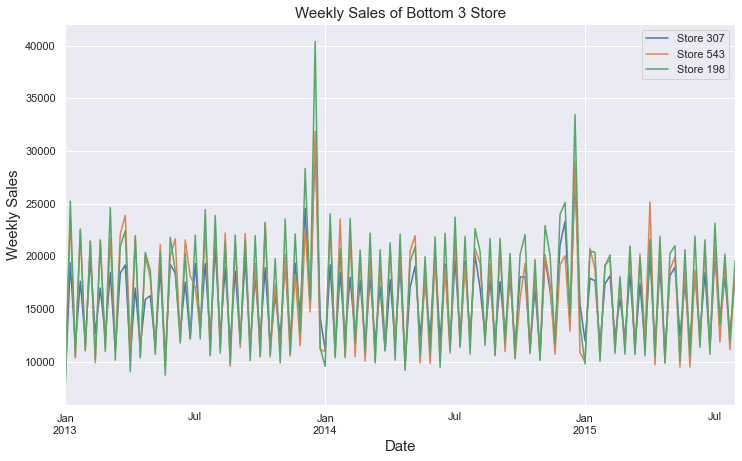

In [38]:
sales_by_store.topN_weekly_salesplot(3)
sales_by_store.bottomN_weekly_salesplot(3)

## Check Weekly Sales Plot for Top 10 and Bottom 10 Stores

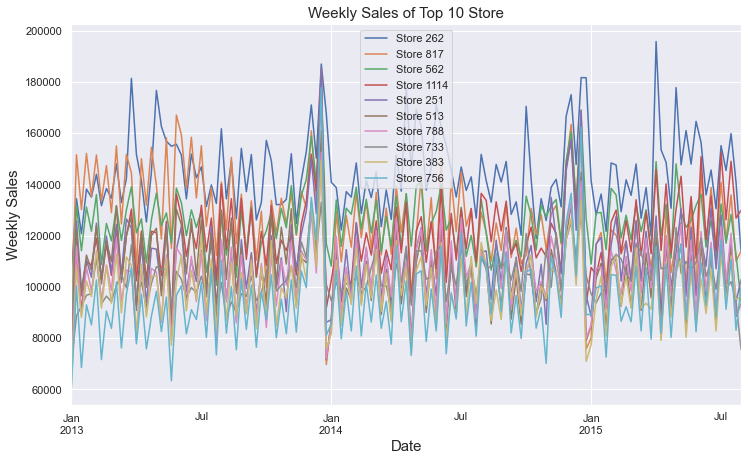

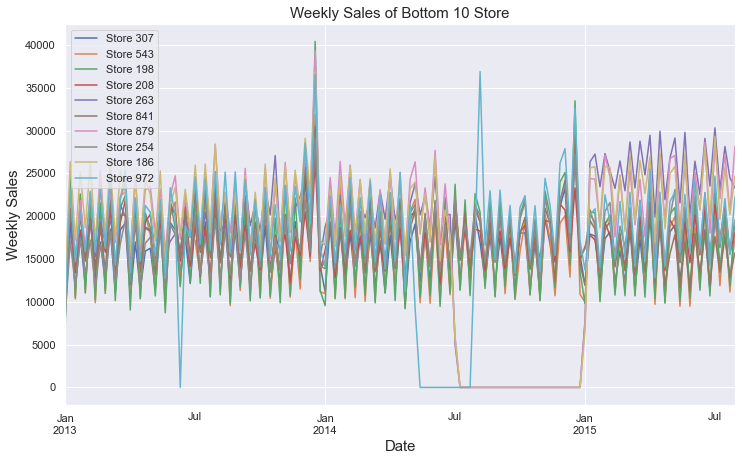

In [39]:
sales_by_store.topN_weekly_salesplot(10)
sales_by_store.bottomN_weekly_salesplot(10)

## Conclusion 1: we can see peak during christmas season is common among most of stores 

### Add 3 new metrics: AverageDailySales, AverageDailyCustomer, SalesPerCustomer 

In [40]:
store_sum = df_process.pivot_table('Store', 'sum')
store_sum['AverageDailySales'] = store_sum['Sales']/store_sum['Open']
store_sum['AverageDailyCustomer'] = store_sum['Customers']/store_sum['Open']
store_sum['SalesPerCustomer'] = store_sum['Sales']/store_sum['Customers']

In [41]:
store_sum.sort_values('Sales', ascending=False)

,Customers,DayOfWeek,Open,Promo,Sales,SchoolHoliday,StateHoliday,AverageDailySales,AverageDailyCustomer,SalesPerCustomer
Store,,,,,,,,,,
262,3204694,3766,942,360,19516842,169,38,20718.515924,3402.010616,6.090080
817,2454370,3766,784,360,17057867,173,38,21757.483418,3130.573980,6.949998
562,2924960,3766,942,360,16927322,209,38,17969.556263,3105.053079,5.787198
1114,2509542,3766,784,360,16202585,169,38,20666.562500,3200.946429,6.456391
251,1908934,3766,779,360,14896870,170,43,19123.068036,2450.492940,7.803764
...,...,...,...,...,...,...,...,...,...,...
263,221342,3033,622,286,2306075,124,39,3707.516077,355.855305,10.418606
208,324162,3766,784,360,2302052,173,38,2936.290816,413.471939,7.101548
198,264690,3766,782,360,2268273,167,39,2900.604859,338.478261,8.569546


## Average Daily Sales

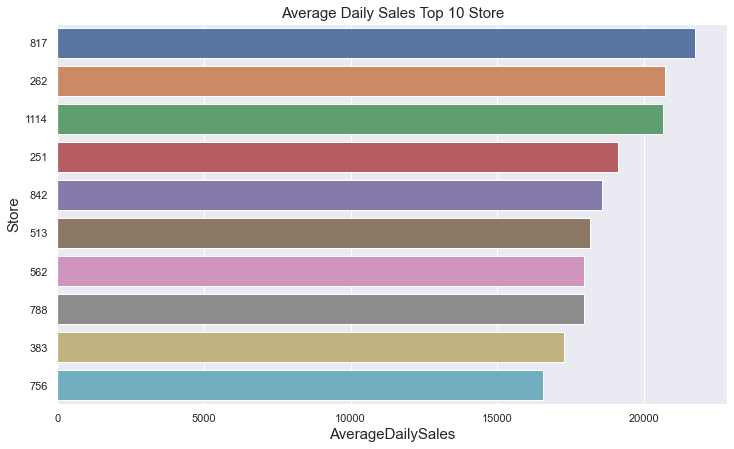

In [42]:
# plot 10 stores with the highest avarege daily sales

sns.barplot(y=store_sum.AverageDailySales.nlargest(10).index,
            x=store_sum.AverageDailySales.nlargest(10).values,
            order = store_sum.AverageDailySales.nlargest(10).index,
           orient='h')

plt.title('Average Daily Sales Top 10 Store', fontsize=15)
plt.xlabel('AverageDailySales', fontsize=15)
plt.ylabel('Store', fontsize=15)
plt.show()

In [43]:
# # check the ranking of sales per customer of store 262, store 817
# newstoredata.SalesPerCustomer[261]
# print(sorted(newstoredata.SalesPerCustomer).index(newstoredata.SalesPerCustomer[261]))

# newstoredata.SalesPerCustomer[816]
# print(sorted(newstoredata.SalesPerCustomer).index(newstoredata.SalesPerCustomer[816]))

# newstoredata.SalesPerCustomer[1113]
# print(sorted(newstoredata.SalesPerCustomer).index(newstoredata.SalesPerCustomer[1113]))

# Note: If we can increase the sales per customer for store 262, 817, 34, the impact on increasing total sales will be big.


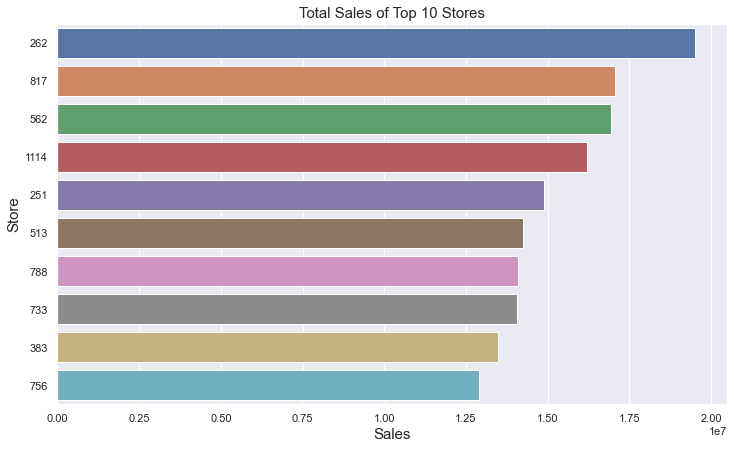

In [44]:
# compare it with plot of 10 highest total sales (sum of 942 days)

sumsales_by_store.topN_barplot(10)

In [45]:
set(sales_by_store.nlargest_ID(10)).difference(set(store_sum.AverageDailySales.nlargest(10).index))

{733}

In [46]:
set(store_sum.AverageDailySales.nlargest(10).index).difference(set(sales_by_store.nlargest_ID(10)))

{842}

We can see the top 10 stores in average daily sales ranking plot are very similar to top 10 stores in total sales ranking, except store 842 replaced store 733 in average daily sales ranking. 

## Average Daily Customers 

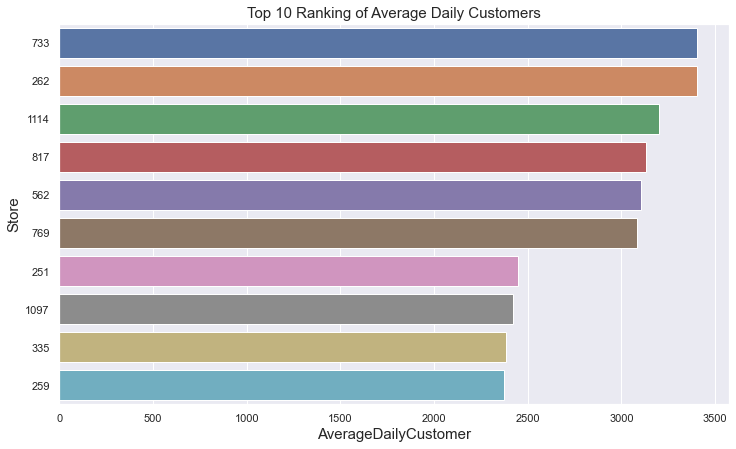

In [47]:
sns.barplot(y=store_sum.AverageDailyCustomer.nlargest(10).index,
            x=store_sum.AverageDailyCustomer.nlargest(10).values,
            order = store_sum.AverageDailyCustomer.nlargest(10).index,
           orient='h')

plt.title('Top 10 Ranking of Average Daily Customers', fontsize=15)
plt.xlabel('AverageDailyCustomer', fontsize=15)
plt.ylabel('Store', fontsize=15)
plt.show()

## Sales Per Customer 

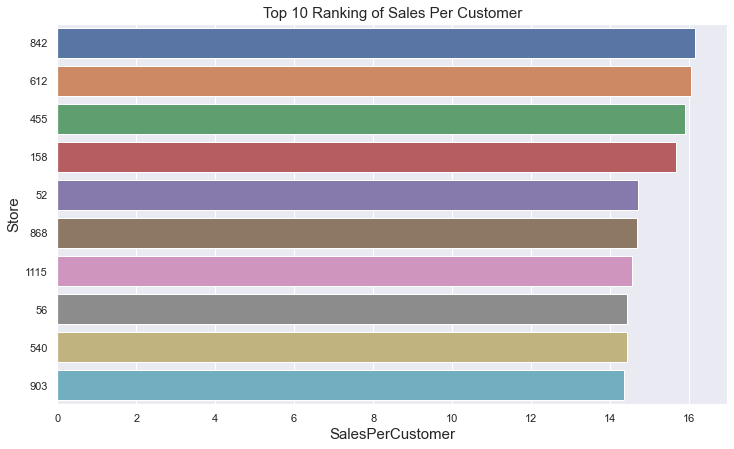

In [48]:
sns.barplot(y=store_sum.SalesPerCustomer.nlargest(10).index,
            x=store_sum.SalesPerCustomer.nlargest(10).values,
            order = store_sum.SalesPerCustomer.nlargest(10).index,
           orient='h')

plt.title('Top 10 Ranking of Sales Per Customer', fontsize=15)
plt.xlabel('SalesPerCustomer', fontsize=15)
plt.ylabel('Store', fontsize=15)
plt.show()